In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar



In [ ]:


# Importar el archivo CSV
ruta_csv = r"..\Datasets\FILTRADO\filtro_Maryland.csv"
df = pd.read_csv(ruta_csv)

# Importar el archivo de sitios
sitio_csv = r"C:\Users\pablo\OneDrive\Documentos\CURSOS\HENRY\PROYECTO FINAL\Datasets\FILTRADO\sitios_filtrado.csv"
df_sitio = pd.read_csv(sitio_csv)


In [3]:
df_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,34.058092,-118.292130,['Korean restaurant'],4.4,18,NaN,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,NaN,33.916402,-118.010855,['Restaurant'],4.5,18,NaN,"[['Thursday', '11AM–9:30PM'], ['Friday', '11AM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,NaN,https://www.google.com/maps/place//data=!4m2!3...
2,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,NaN,41.616079,-93.865487,"['Bakery', 'Health food restaurant']",4.7,21,NaN,"[['Thursday', '10AM–5:30PM'], ['Friday', '10AM...",{'Service options': ['Delivery']},Permanently closed,"['0x87ee974869295555:0x95f310d065882c9b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,['Restaurant'],4.0,8,NaN,NaN,"{'Service options': ['Delivery'], 'Amenities':...",NaN,"['0x89c6c62a40f4b733:0x73bfeec1898f272b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,NaN,21.637796,-157.920714,['Restaurant'],4.4,18,NaN,"[['Thursday', '11AM–8PM'], ['Friday', '11AM–8P...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"['0x7c00451360f80cf1:0x930291a38bab3132', '0x7...",https://www.google.com/maps/place//data=!4m2!3...


In [4]:
df.head()


,user_id,name,time,rating,text,pics,resp,gmap_id
0,104896511599552541171,Tini Portis,1630628204969,2,I placed an order through grubhub and didn't r...,[{'url': ['https://lh5.googleusercontent.com/p...,NaN,0x89c81b5aa4cdcdf9:0xa143ffc99519b98e
1,108982468475145452393,S. April Ratliff,1629740397987,5,This is my go to place to eat whenever I'm in ...,[{'url': ['https://lh5.googleusercontent.com/p...,NaN,0x89c81b5aa4cdcdf9:0xa143ffc99519b98e
2,110454122932291485833,Imani Martin,1626390092362,5,Great to see a black owned business in the com...,NaN,NaN,0x89c81b5aa4cdcdf9:0xa143ffc99519b98e
3,101614659037738957766,D.S. Mitchell,1629212289566,5,Visited twice. Had Jerk chicken tacos and jerk...,NaN,NaN,0x89c81b5aa4cdcdf9:0xa143ffc99519b98e
4,105756597556466271460,Paula Moore,1627643367520,2,Nice atmosphere.lack of variety in what they o...,NaN,NaN,0x89c81b5aa4cdcdf9:0xa143ffc99519b98e


In [5]:
df = df.merge(df_sitio[['gmap_id', 'name']], on='gmap_id', how='left')

In [6]:
# Cambiar el nombre de las columnas name_x y name_y
df = df.rename(columns={'name_x': 'name', 'name_y': 'name_sitio'})

In [7]:
# Cantidad de filas y columnas
df.shape

(244904, 9)

In [8]:
# Ver los tipos de datos de cada columna
print(df.dtypes)

user_id       object
name          object
time           int64
rating         int64
text          object
pics          object
resp          object
gmap_id       object
name_sitio    object
dtype: object


In [9]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id',
       'name_sitio'],
      dtype='object')

In [10]:
# Convertir las columnas  a tipo 'string'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('string')

In [11]:
df.duplicated().sum()

9986

In [12]:
# Filas duplicadas (incluyendo los originales)
duplicadas = df[df.duplicated(keep=False)]

# Ordenamos por todas las columnas para que se vean juntas
duplicadas = duplicadas.sort_values(by=df.columns.tolist())

# Mostramos el resultado
print(duplicadas)


                      user_id             name           time  rating  \
21599   100000455596004622639   Michelle Olson  1472779031091       5   
21601   100000455596004622639   Michelle Olson  1472779031091       5   
78410   100003058351093767195     Irfanna Shah  1508589043526       5   
78471   100003058351093767195     Irfanna Shah  1508589043526       5   
189429  100004119747151798634        Captain-A  1599611513984       4   
...                       ...              ...            ...     ...   
37903   118442928095650852281     Indyia Simms  1528510201957       5   
93904   118443435284872636604  LaTronda Savage  1553092118109       5   
93931   118443435284872636604  LaTronda Savage  1553092118109       5   
99059   118446067375859079614   John Calomeris  1598661316654       5   
99062   118446067375859079614   John Calomeris  1598661316654       5   

                                                     text  \
21599   They are always there when I need them whateve...   
2

In [13]:
# Eliminar filas duplicadas
df = df.drop_duplicates()


In [14]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

user_id            0
name               0
time               0
rating             0
text           99471
pics          227577
resp          204163
gmap_id            0
name_sitio         0
dtype: int64

In [15]:
# Porcentaje de valores nulos por columna
(df.isnull().mean() * 100)

user_id        0.000000
name           0.000000
time           0.000000
rating         0.000000
text          42.342860
pics          96.875080
resp          86.908198
gmap_id        0.000000
name_sitio     0.000000
dtype: float64

In [16]:
# Estadísticas descriptivas para columnas numéricas
df.describe() 

,time,rating
count,2.349180e+05,234918.000000
mean,1.551016e+12,4.195157
std,4.304824e+10,1.134679
min,1.105747e+12,1.000000
25%,1.525861e+12,4.000000
50%,1.554066e+12,5.000000
75%,1.578711e+12,5.000000
max,1.631128e+12,5.000000


In [17]:
outliers = pd.DataFrame()

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers_col = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    outliers = pd.concat([outliers, outliers_col])

print(f"Total de outliers detectados: {len(outliers)}")

Total de outliers detectados: 25458


In [18]:
# Ver de qué columnas vienen los outliers
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    cantidad = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    print(f"{col}: {cantidad} outliers")

time: 2826 outliers
rating: 22632 outliers


In [19]:
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
print("\nFechas convertidas:\n", df[['time', 'fecha']].head())


Fechas convertidas:
             time                   fecha
0  1630628204969 2021-09-03 00:16:44.969
2  1629740397987 2021-08-23 17:39:57.987
4  1626390092362 2021-07-15 23:01:32.362
6  1629212289566 2021-08-17 14:58:09.566
8  1627643367520 2021-07-30 11:09:27.520


In [20]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,name_sitio,fecha
0,104896511599552541171,Tini Portis,1630628204969,2,I placed an order through grubhub and didn't r...,[{'url': ['https://lh5.googleusercontent.com/p...,<NA>,0x89c81b5aa4cdcdf9:0xa143ffc99519b98e,Jerk at Nite,2021-09-03 00:16:44.969
2,108982468475145452393,S. April Ratliff,1629740397987,5,This is my go to place to eat whenever I'm in ...,[{'url': ['https://lh5.googleusercontent.com/p...,<NA>,0x89c81b5aa4cdcdf9:0xa143ffc99519b98e,Jerk at Nite,2021-08-23 17:39:57.987
4,110454122932291485833,Imani Martin,1626390092362,5,Great to see a black owned business in the com...,<NA>,<NA>,0x89c81b5aa4cdcdf9:0xa143ffc99519b98e,Jerk at Nite,2021-07-15 23:01:32.362
6,101614659037738957766,D.S. Mitchell,1629212289566,5,Visited twice. Had Jerk chicken tacos and jerk...,<NA>,<NA>,0x89c81b5aa4cdcdf9:0xa143ffc99519b98e,Jerk at Nite,2021-08-17 14:58:09.566
8,105756597556466271460,Paula Moore,1627643367520,2,Nice atmosphere.lack of variety in what they o...,<NA>,<NA>,0x89c81b5aa4cdcdf9:0xa143ffc99519b98e,Jerk at Nite,2021-07-30 11:09:27.520


# Análisis de Rating

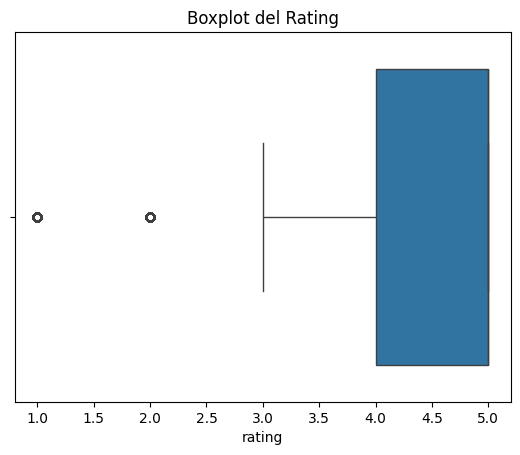

In [21]:
sns.boxplot(x='rating', data=df)
plt.title('Boxplot del Rating')
plt.show()

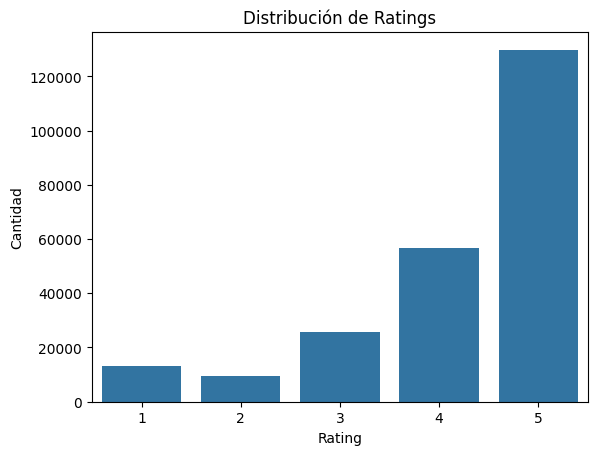

In [22]:
sns.countplot(x='rating', data=df)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()


In [23]:
# Contar cantidad de cada rating
rating_counts = df['rating'].value_counts().sort_index()

# Calcular porcentaje
rating_percentage = (rating_counts / len(df)) * 100

# Crear la tabla combinada
tabla_rating = pd.DataFrame({
    'Rating': rating_counts.index,
    'Cantidad': rating_counts.values,
    'Porcentaje (%)': rating_percentage.round(2)
})

# Mostrar la tabla
print(tabla_rating)

        Rating  Cantidad  Porcentaje (%)
rating                                  
1            1     13079            5.57
2            2      9553            4.07
3            3     25645           10.92
4            4     56807           24.18
5            5    129834           55.27


Análisis:

Más del 79% de las reseñas tienen 4 o 5 estrellas → fuerte tendencia positiva.

Solo el 9% son críticas negativas (1 o 2 estrellas).

El valor más común es 5 estrellas, lo que podría indicar alta satisfacción.


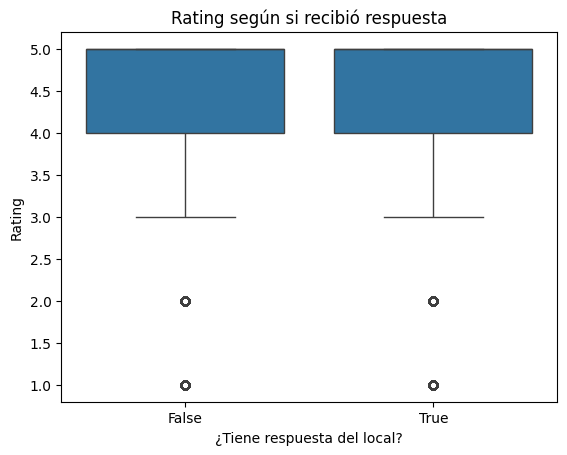

In [24]:
df['tiene_resp'] = df['resp'].notna()
sns.boxplot(x='tiene_resp', y='rating', data=df)
plt.title("Rating según si recibió respuesta")
plt.xlabel("¿Tiene respuesta del local?")
plt.ylabel("Rating")
plt.show()

Análisis:

No se muestra diferencias en la variacion de rating y la respuesta recibida

# Análisis de Review

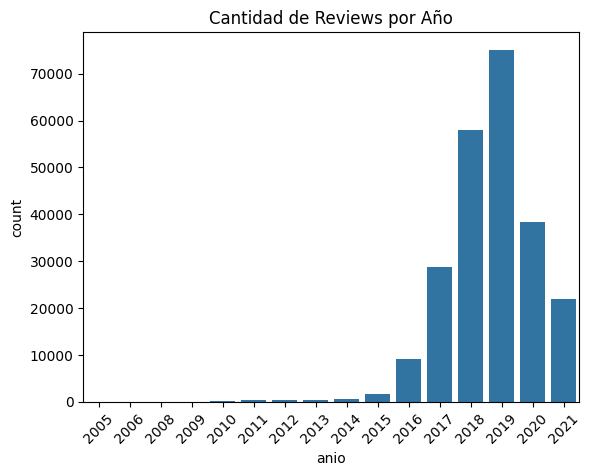

In [25]:
df['anio'] = df['fecha'].dt.year
sns.countplot(x='anio', data=df)
plt.title('Cantidad de Reviews por Año')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Asegurate de tener la columna 'anio' creada desde la fecha
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year

# Contar reviews por año
reviews_por_anio = df['anio'].value_counts().sort_index()

# Crear la tabla
tabla_reviews_anio = pd.DataFrame({
    'Año': reviews_por_anio.index,
    'Cantidad de Reviews': reviews_por_anio.values
})

# Mostrar la tabla
print(tabla_reviews_anio)

     Año  Cantidad de Reviews
0   2005                    2
1   2006                    5
2   2008                    9
3   2009                   13
4   2010                  141
5   2011                  312
6   2012                  365
7   2013                  410
8   2014                  545
9   2015                 1729
10  2016                 9110
11  2017                28857
12  2018                57879
13  2019                75064
14  2020                38455
15  2021                22022


Análisis:

Se muestra un fuerte crecimiento desde 2016, con picos en 2018 y 2019.
Máximo en 2019: más de 75064 reviews.
Caída en 2020 y 2021, posiblemente relacionada con la pandemia (COVID-19 afectó la movilidad y el turismo).
Antes de 2016, el volumen de reseñas era muy bajo.

In [27]:
total_reviews = len(df)

text_count = df['text'].notna().sum()
pics_count = df['pics'].notna().sum()
resp_count = df['resp'].notna().sum()

print(f"Reviews con texto: {text_count} ({(text_count / total_reviews * 100):.2f}%)")
print(f"Reviews con fotos: {pics_count} ({(pics_count / total_reviews * 100):.2f}%)")
print(f"Reviews con respuesta: {resp_count} ({(resp_count / total_reviews * 100):.2f}%)")

Reviews con texto: 135447 (57.66%)
Reviews con fotos: 7341 (3.12%)
Reviews con respuesta: 30755 (13.09%)


In [28]:
print("Lugares únicos (gmap_id):", df['name_sitio'].nunique())

Lugares únicos (gmap_id): 2045


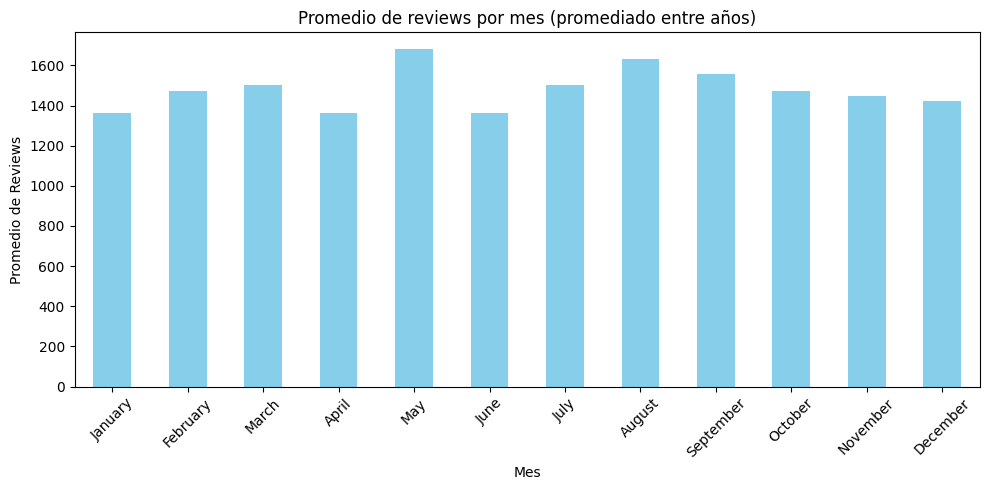

In [29]:
# Asegurar que las fechas están en formato datetime
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Agrupar por año y mes para contar reviews
grupo_anio_mes = df.groupby(['anio', 'mes']).size().reset_index(name='cantidad')

# Calcular promedio de reviews por mes (promediado entre años)
promedio_por_mes = grupo_anio_mes.groupby('mes')['cantidad'].mean()

# Asegurar que estén los 12 meses
promedio_por_mes = promedio_por_mes.reindex(range(1, 13), fill_value=0)



# Graficar
plt.figure(figsize=(10, 5))
promedio_por_mes.plot(kind='bar', color='skyblue')
plt.title("Promedio de reviews por mes (promediado entre años)")
plt.xlabel("Mes")
plt.ylabel("Promedio de Reviews")
plt.xticks(ticks=range(12), labels=[calendar.month_name[m] for m in range(1, 13)], rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Crear DataFrame con nombres de mes
tabla_reviews_mes = pd.DataFrame({
    'Mes': [calendar.month_name[m] for m in promedio_por_mes.index],
    'Promedio de Reviews': promedio_por_mes.values.round(2)
})

# Mostrar la tabla
print(tabla_reviews_mes)

          Mes  Promedio de Reviews
0     January              1364.93
1    February              1472.79
2       March              1500.50
3       April              1364.69
4         May              1680.75
5        June              1363.53
6        July              1504.00
7      August              1630.54
8   September              1557.67
9     October              1473.00
10   November              1445.50
11   December              1422.15


Análisis:

Actividad moderada en todo el año
Aunque no hay picos extremos, mayo y agosto muestran una actividad más fuerte en promedio.

Meses más bajos: abril y junio
Estos meses tienden a tener menos reseñas en comparación con otros. Esto podría deberse a
temporada baja de turismo o consumo, 
condiciones climáticas o feriados que afectan el tráfico de personas.

No hay una estacionalidad clara y marcada
La diferencia entre los meses no es tan extrema como para pensar en una única temporada fuerte. Es una distribución relativamente estable, pero con altibajos sutiles.

# Análisis de Lugares

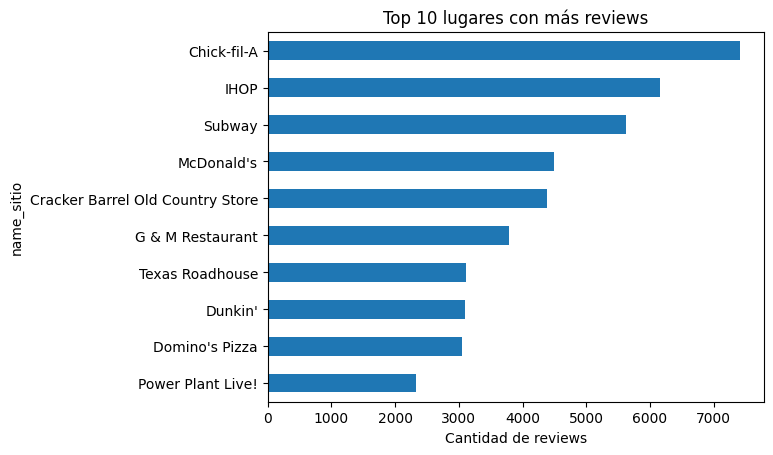

In [31]:
top_lugares = df['name_sitio'].value_counts().head(10)
top_lugares.plot(kind='barh')
plt.title("Top 10 lugares con más reviews")
plt.xlabel("Cantidad de reviews")
plt.ylabel("name_sitio")
plt.gca().invert_yaxis()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_7552\273206112.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10['name_sitio'], rotation=45, ha='right')


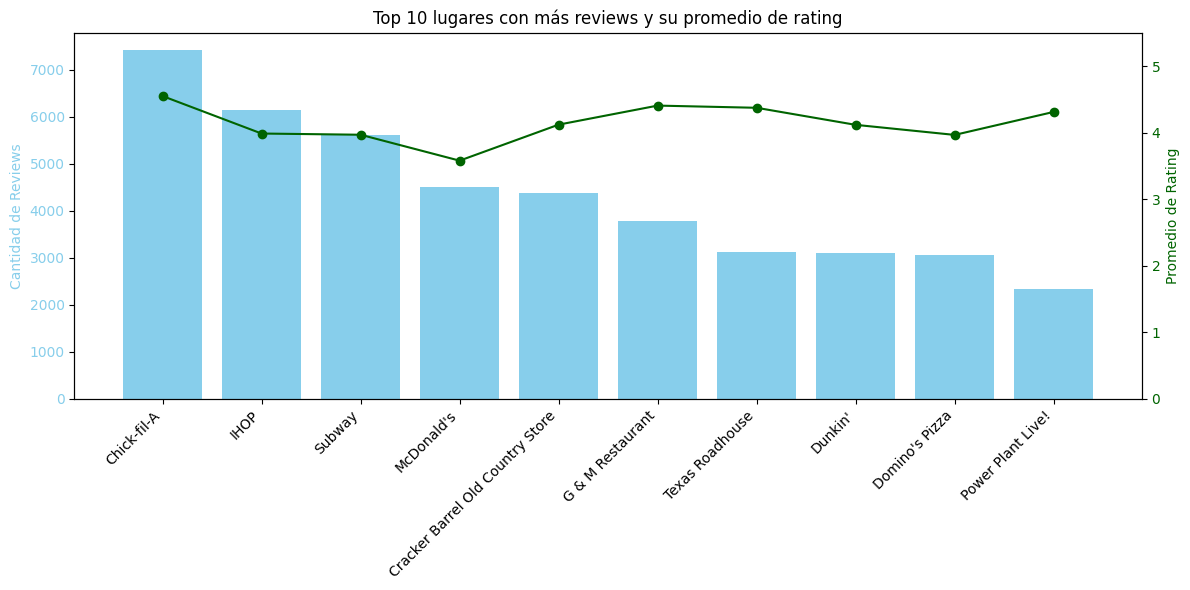

In [32]:
# Agrupar por lugar: contar y promediar ratings
estadisticas = df.groupby('name_sitio')['rating'].agg(['count', 'mean']).reset_index()
estadisticas.columns = ['name_sitio', 'Cantidad de Reviews', 'Promedio de Rating']

# Filtrar lugares con al menos 50 reviews
estadisticas_filtradas = estadisticas[estadisticas['Cantidad de Reviews'] >= 50]

# Elegir los 10 lugares con más reviews (para orden visual claro)
top10 = estadisticas_filtradas.sort_values(by='Cantidad de Reviews', ascending=False).head(10)

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje izquierdo: cantidad de reviews
ax1.bar(top10['name_sitio'], top10['Cantidad de Reviews'], color='skyblue', label='Cantidad de Reviews')
ax1.set_ylabel('Cantidad de Reviews', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top10['name_sitio'], rotation=45, ha='right')

# Eje derecho: promedio de rating
ax2 = ax1.twinx()
ax2.plot(top10['name_sitio'], top10['Promedio de Rating'], color='darkgreen', marker='o', label='Promedio de Rating')
ax2.set_ylabel('Promedio de Rating', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax2.set_ylim(0, 5.5)

# Título y leyenda
plt.title('Top 10 lugares con más reviews y su promedio de rating')
fig.tight_layout()
plt.show()



Análisis:
Todos los lugares del top tienen un rating promedio alto, mayor a 3, lo que muestra una alta satisfacción de los usuarios.

La cantidad de reviews varía, pero todos superan las 2000, lo cual da más confianza en la calidad del promedio.


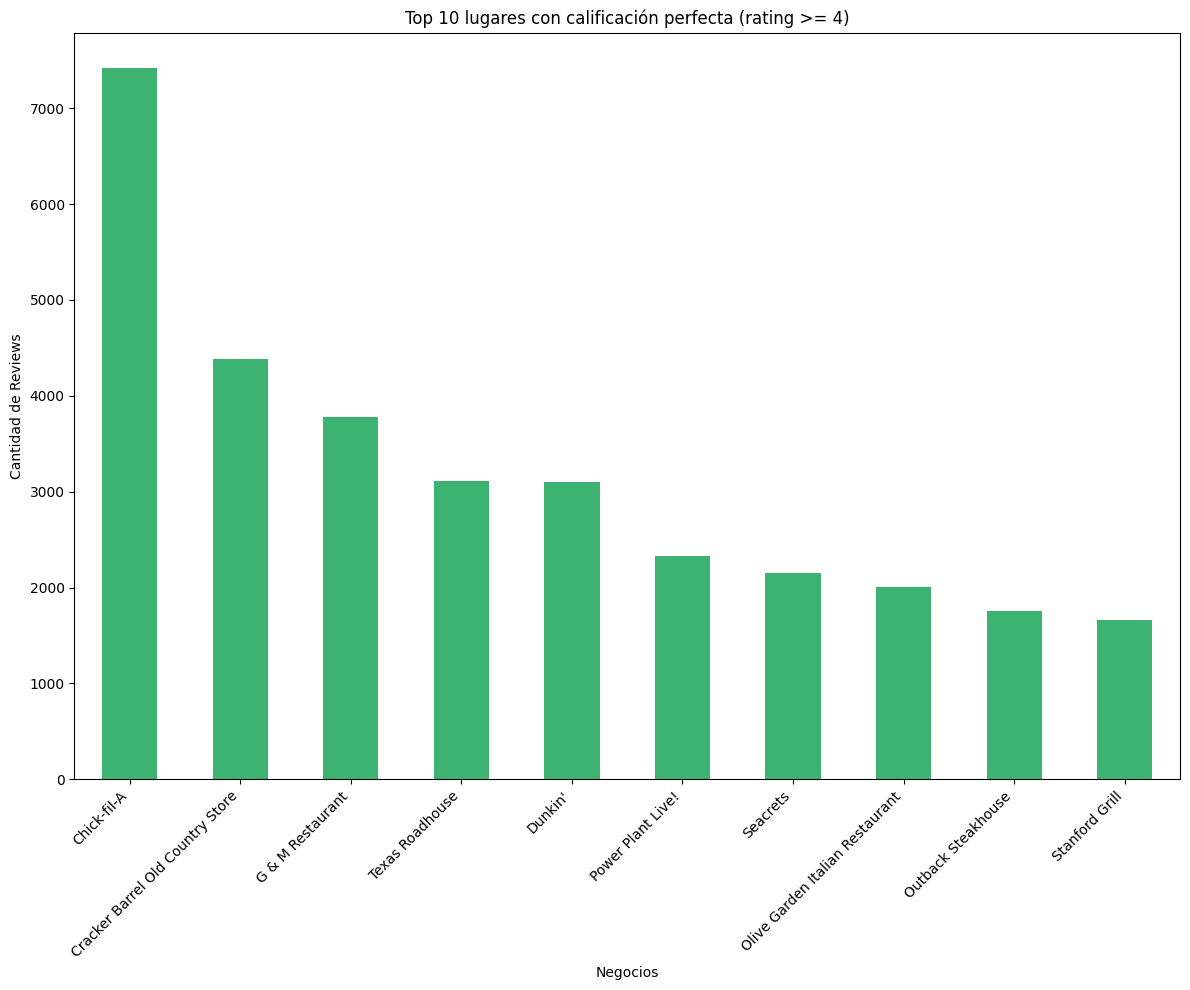

In [33]:
# Asegurar que la fecha esté en formato datetime (por si acaso)
df['fecha'] = pd.to_datetime(df['time'], unit='ms')

# Calcular el promedio de rating por lugar (gmap_id)
rating_promedio = df.groupby('name_sitio')['rating'].mean()

# Filtrar lugares con calificación perfecta
rating_maximos = rating_promedio[rating_promedio >= 4]

# Filtrar el DataFrame original para obtener solo esos lugares
top_rating_5 = df[df['name_sitio'].isin(rating_maximos.index)]

# Contar cantidad de reviews por gmap_id con rating >= 4 y quedarnos con los 10 más reseñados
top_rating_5_count = top_rating_5['name_sitio'].value_counts().head(10)

# Graficar
plt.figure(figsize=(12, 10))
top_rating_5_count.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 lugares con calificación perfecta (rating >= 4)")
plt.xlabel("Negocios")
plt.ylabel("Cantidad de Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Análisis:

Alta satisfacción con volumen relevante, todos los lugares listados tienen una combinación ideal de rating alto y muchas reseñas. Eso indica que no solo tuvieron buena suerte con pocas opiniones, sino que muchos usuarios coincidieron en su buena experiencia. Se marca la diferencia del negocio Click-fil-A por la cantidad de reviews.

Estos 10 lugares combinan excelencia en atención/producto con volumen de participación de usuarios, lo que los posiciona como referentes en calidad y satisfacción.